In [3]:
import pandas as pd

df_env = pd.read_csv("crop_recommendation.csv")       # file-1
df_fao = pd.read_csv("faostat_data.csv")   # file-2


In [5]:
df_env

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [7]:
df_fao["crop_clean"] = df_fao["Item"].str.lower().str.strip()
df_fao["crop_clean"] = df_fao["crop_clean"].str.split(",")
df_fao = df_fao.explode("crop_clean")
df_fao["crop_clean"] = df_fao["crop_clean"].str.strip()

In [9]:
df_fao


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_clean
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN,anise
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN,badian
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN,coriander
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN,cumin
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN,caraway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5686,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN,wheat
5687,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN,wheat
5688,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN,wheat
5689,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN,wheat


In [11]:
df_env["label_clean"] = df_env["label"].str.lower().str.strip()

In [13]:
df_env

,N,P,K,temperature,humidity,ph,rainfall,label,label_clean
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,coffee


In [15]:
df_merged = df_env.merge(
    df_fao,
    left_on="label_clean",
    right_on="crop_clean",
    how="inner"
)

In [17]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,label_clean,Domain Code,...,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_clean
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,ha,4.490000e+07,A,Official figure,NaN,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,kg/ha,3.115800e+03,A,Official figure,NaN,rice
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN,rice
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2002,2002,ha,4.117610e+07,A,Official figure,NaN,rice
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2002,2002,kg/ha,2.616300e+03,A,Official figure,NaN,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2022,2022,kg/ha,7.742000e+02,E,Estimated value,NaN,coffee
27596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN,coffee
27597,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2023,2023,ha,4.378620e+05,I,Value imputed by a receiving agency,NaN,coffee
27598,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2023,2023,kg/ha,7.602000e+02,E,Estimated value,NaN,coffee


In [20]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,label_clean,Domain Code,...,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_clean
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,ha,4.490000e+07,A,Official figure,NaN,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,kg/ha,3.115800e+03,A,Official figure,NaN,rice
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN,rice
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2002,2002,ha,4.117610e+07,A,Official figure,NaN,rice
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2002,2002,kg/ha,2.616300e+03,A,Official figure,NaN,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27595,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2022,2022,kg/ha,7.742000e+02,E,Estimated value,NaN,coffee
27596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN,coffee
27597,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2023,2023,ha,4.378620e+05,I,Value imputed by a receiving agency,NaN,coffee
27598,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2023,2023,kg/ha,7.602000e+02,E,Estimated value,NaN,coffee


In [22]:
df_merged = df_merged[df_merged["Element"] == "Production"]


In [24]:
for i in df_merged['Element']:
    print(i)

Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production
Production

In [26]:
df_merged.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'label_clean', 'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
       'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code',
       'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note',
       'crop_clean'],
      dtype='object')

In [28]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,label_clean,Domain Code,...,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note,crop_clean
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2002,2002,t,1.077303e+08,A,Official figure,NaN,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2003,2003,t,1.327890e+08,A,Official figure,NaN,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2004,2004,t,1.246971e+08,A,Official figure,NaN,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,QCL,...,113.0,Rice,2005,2005,t,1.376901e+08,A,Official figure,NaN,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27587,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2019,2019,t,3.195000e+05,A,Official figure,NaN,coffee
27590,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2020,2020,t,2.980000e+05,A,Official figure,NaN,coffee
27593,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2021,2021,t,3.340000e+05,A,Official figure,NaN,coffee
27596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,QCL,...,1610.0,"Coffee, green",2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN,coffee


In [30]:
# Columns to remove
cols_to_drop = [
    "Domain Code", "Domain", "Area Code (M49)", "Area",
    "Element Code", "Item Code (CPC)", "Item", "Year Code",
    "Year", "Flag", "Flag Description", "Note", "Unit"
]

# Drop them
df_merged.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Verify
df_merged.head()


C:\Users\nehap\AppData\Local\Temp\ipykernel_20728\3852306409.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop(columns=cols_to_drop, inplace=True, errors='ignore')


,N,P,K,temperature,humidity,ph,rainfall,label,label_clean,Element,Value,crop_clean
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,139900000.0,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,107730304.0,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,132789000.0,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,124697104.0,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,137690096.0,rice


In [32]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9200 entries, 2 to 27599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            9200 non-null   int64  
 1   P            9200 non-null   int64  
 2   K            9200 non-null   int64  
 3   temperature  9200 non-null   float64
 4   humidity     9200 non-null   float64
 5   ph           9200 non-null   float64
 6   rainfall     9200 non-null   float64
 7   label        9200 non-null   object 
 8   label_clean  9200 non-null   object 
 9   Element      9200 non-null   object 
 10  Value        9200 non-null   float64
 11  crop_clean   9200 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 934.4+ KB


In [35]:
df_merged.shape


(9200, 12)

In [37]:
df_merged.isnull().sum()


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
label_clean    0
Element        0
Value          0
crop_clean     0
dtype: int64

In [39]:
df_merged.duplicated().sum()  # count duplicates
df_merged.drop_duplicates(inplace=True)


C:\Users\nehap\AppData\Local\Temp\ipykernel_20728\1701946288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged.drop_duplicates(inplace=True)


In [41]:
df_merged

,N,P,K,temperature,humidity,ph,rainfall,label,label_clean,Element,Value,crop_clean
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,1.399000e+08,rice
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,1.077303e+08,rice
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,1.327890e+08,rice
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,1.246971e+08,rice
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,Production,1.376901e+08,rice
...,...,...,...,...,...,...,...,...,...,...,...,...
27587,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,Production,3.195000e+05,coffee
27590,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,Production,2.980000e+05,coffee
27593,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,Production,3.340000e+05,coffee
27596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,coffee,Production,3.404065e+05,coffee


In [43]:
df_merged.describe()


,N,P,K,temperature,humidity,ph,rainfall,Value
count,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9.100000e+03
mean,70.331978,64.314176,77.999890,24.498110,75.848996,6.490363,159.680555,4.089565e+07
std,31.192129,41.058908,71.206579,5.123103,10.466566,0.594836,64.028720,6.892925e+07
min,0.000000,15.000000,25.000000,8.825675,50.045570,5.005307,65.010953,2.620000e+05
25%,40.000000,37.000000,35.000000,23.174033,71.147826,6.081173,74.821447,8.807000e+05
50%,78.000000,47.000000,40.000000,24.838462,80.762382,6.425420,169.116803,1.853749e+06
75%,91.000000,120.000000,195.000000,26.389054,82.752419,6.980401,195.094831,1.077303e+08
max,120.000000,145.000000,205.000000,41.948657,89.891065,7.868475,298.560117,2.067270e+08


In [45]:
df_merged.nunique()


N               98
P               72
K               32
temperature    400
humidity       400
ph             400
rainfall       400
label            4
label_clean      4
Element          1
Value           91
crop_clean       4
dtype: int64

In [47]:
df_merged['crop_clean'].value_counts()


crop_clean
rice      2300
grapes    2300
jute      2300
coffee    2200
Name: count, dtype: int64

In [49]:
def detect_outliers(col):
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_merged[(df_merged[col] < lower) | (df_merged[col] > upper)]

num_cols = ['N','P','K','temperature','humidity','ph','rainfall','Value']
for col in num_cols:
    print(col, len(detect_outliers(col)))


N 0
P 0
K 0
temperature 1334
humidity 528
ph 0
rainfall 0
Value 0


In [51]:
def remove_outliers(col):
    Q1 = df_merged[col].quantile(0.25)
    Q3 = df_merged[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df_merged[(df_merged[col] >= lower) & (df_merged[col] <= upper)]

df_clean = df_merged.copy()
for col in num_cols:
    df_clean = remove_outliers(col)

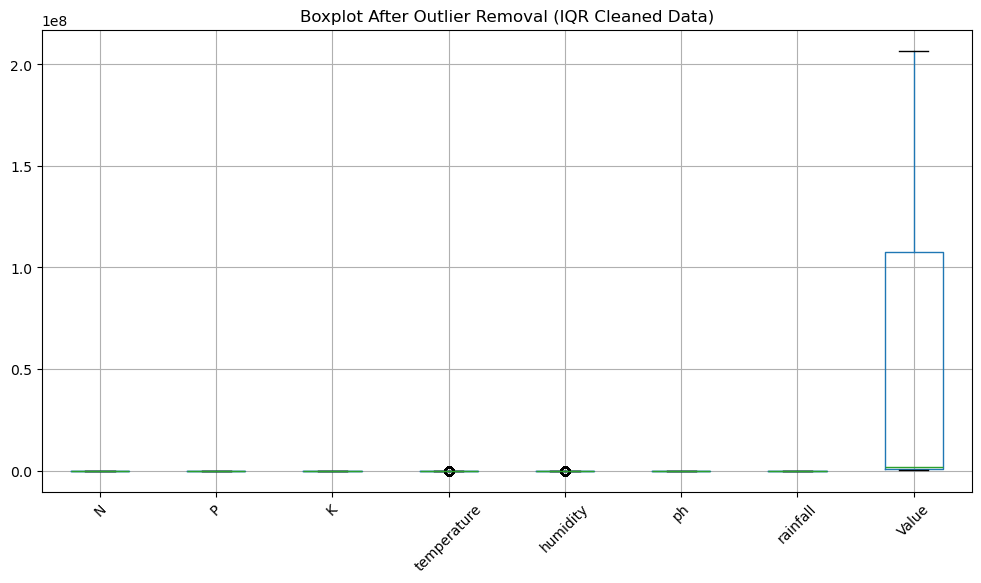

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
df_clean[num_cols].boxplot()
plt.title("Boxplot After Outlier Removal (IQR Cleaned Data)")
plt.xticks(rotation=45)
plt.show()


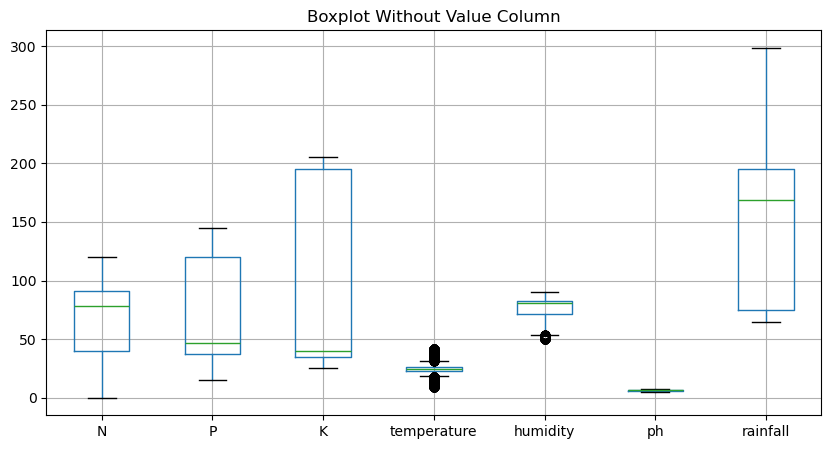

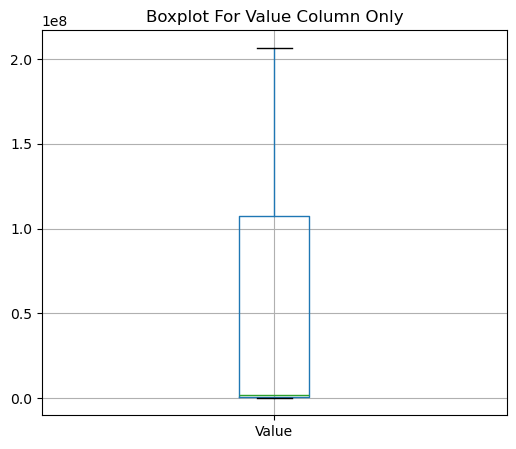

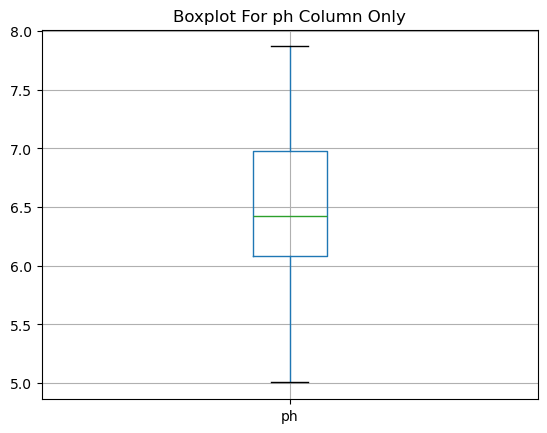

In [69]:
plt.figure(figsize=(10,5))
df_clean[num_cols].drop(columns=['Value']).boxplot()
plt.title("Boxplot Without Value Column")
plt.show()

plt.figure(figsize=(6,5))
df_clean.boxplot(column=['Value'])
plt.title("Boxplot For Value Column Only")
plt.show()
df_clean.boxplot(column=['ph'])
plt.title("Boxplot For ph Column Only")
plt.show()

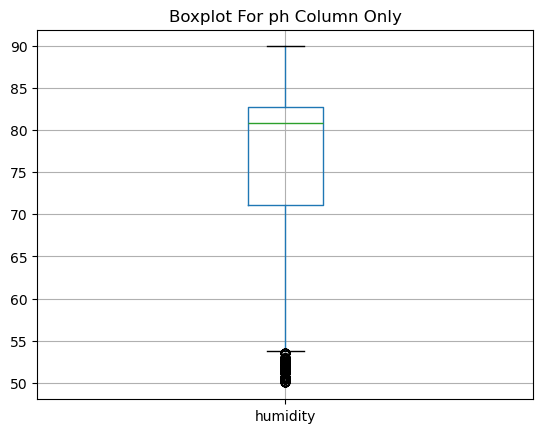

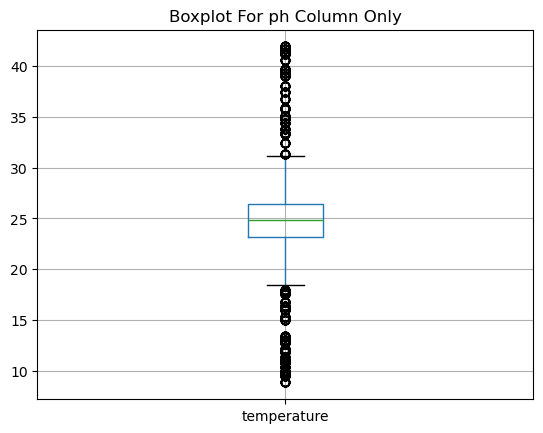

In [71]:
df_clean.boxplot(column=['humidity'])
plt.title("Boxplot For ph Column Only")
plt.show()
df_clean.boxplot(column=['temperature'])
plt.title("Boxplot For ph Column Only")
plt.show()

In [61]:
df_merged['crop_clean'].value_counts()

crop_clean
rice      2300
grapes    2300
jute      2300
coffee    2200
Name: count, dtype: int64

In [67]:
set(df_env["label_clean"].unique()) - set(df_fao["crop_clean"].unique())


{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'cotton',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'watermelon'}